<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ceros_funciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import sympy as sp

# Codigo Markdown:
Los numeras a, b, c y d tiene que ver con escritura en código Markdown y comandos de latex: 

a. Escriba en pseudocódigo los pasos para aplicar el método de la bisección.

b. Realice la deducción del metodo de Newton-Rapshon, se recomienda escribir las ecuaciones en formato latex, para ello puede emplear las siguientes expresiones:

c. ¿Cuál es la diferencia del metodo de Newton-Rapson con respecto al de la secante?


d. Escriba en pseudocódigo los pasos para aplicar el método Punto Fijo.



Comentarios para escribir en latex

*   Entre simbolos \$ \$, puedes porner expresiones  puede poner expresiones, ejemplo:  $y = a_0 x^2 + b_1$  

*  Las funciones pueden ser definidas entre \\$,  poniendo un \\, antes de la funcion ejemplo: \\$ \\sinx \\$,   asi las funciones quedarian de esta manera : 

> $\sin x$, $\tan x$, $\sec x$, $\sqrt{a} $, $\frac{a}{b}, \frac{df}{dt}$

* Puedes generar tambien escribir ecuaciones con la instrucción:

  \\begin{equation} 

    \\sin x  
  
  \\end{equation}

Ejemplo:

  \begin{equation} 
    \frac{df}{dx} = \sin x  
  \end{equation}







# **Respuesta:**

a. Pseudocódigo del método de la bisección:

*  Definir una función f(x) continua en el intervalo [a,b] tal que f(a) y f(b) 
tengan signos opuestos.
*  Calcular el punto medio c en el intervalo
*  Evaluar f(c) y determinar si tiene el mismo signo que f(a) o f(b).
**  Si f(c) tiene el mismo signo que f(a), entonces se reemplaza a por c.
**  Si f(c) tiene el mismo signo que f(b), entonces se reemplaza b por c.
*  Repetir desde el segundo paso hasta que la solución sea suficientemente precisa.

\
b. Deducción del método de Newton-Raphson:

La fórmula general del método de Newton-Raphson es:
\begin{equation} 
    x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\end{equation}

*  Empezamos con una estimación inicial x0 de la raíz.
*  Calculamos f'(x0).
*  La ecuación de la recta de la derivada es y = f(x0) + f'(x0) * (x - x0).
*  Encontramos el valor de x donde la recta intersecta el eje x
*  Este valor es nuestra nueva estimación x1.
*  Repetimos desde el segundo paso hasta hasta que la solución sea suficientemente precisa.


c. Diferencia entre el método de Newton-Raphson y el de la secante:

La principal diferencia entre los dos métodos es cómo se calcula la pendiente de la tangente. En el método de Newton-Raphson, la pendiente de la tangente se calcula usando la derivada de la función. En el método de la secante, la pendiente se calcula aproximando la derivada usando dos puntos cercanos a la raíz.

d. Pseudocódigo del método del Punto Fijo:

*  Escribir la función f(x) como x=g(x)
*  Escoger un valor inicial x0
*  Calcular la siguiente aproximación x1=g(x0)
*  Si la aproximación es suficientemente precisa, detener el proceso y reportar la solución
*  Si no es suficientemente precisa, reemplazar x0 por x1 y repetir desde el tercer paso.

# 2. Ceros de funciones
*Encontrar* los ceros de $e^{x}-2= \cos(e^x-2)$ por diferentes metodos, bisection, newton-rapshon, punto fijo.




 

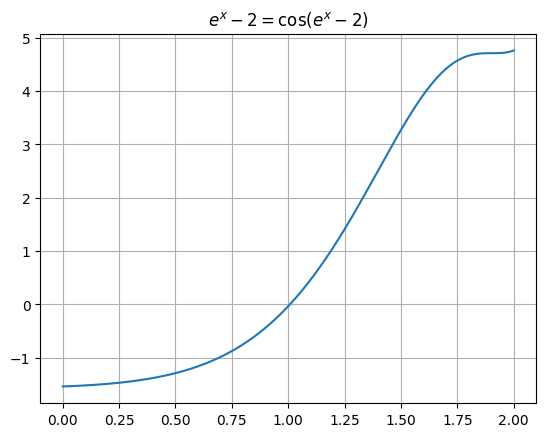

In [234]:
#Función para hallar las raíces:
def f(x):
  return -2+np.exp(x)-np.cos((np.exp(x))-2)
x_=np.linspace(0,2,1000)
plt.plot(x_,f(x_))
plt.title('$e^{x}-2= \cos(e^x-2)$')
plt.grid()

**Bisección**

In [3]:
#elegimos el intervalo a conveniencia por la gráfica:
(a,b)=(0.75,1.25)
P_b= optimize.bisect(f, a, b, xtol=2e-12)
print('La raiz hallada por bisección es:',P_b)

La raiz hallada por bisección es: 1.0076239716563578


**Newton-Raphson**

In [4]:
x=sp.symbols('x')

def fun_s(x):
  return -2+sp.exp(x)-sp.cos((sp.exp(x))-2)

dev_s=sp.diff(fun_s(x),x)
print(dev_s)

exp(x)*sin(exp(x) - 2) + exp(x)


In [5]:
f_p=sp.lambdify(x,dev_s,'numpy')

In [6]:
P_n=optimize.newton(f,1,f_p)
print('La raiz hallada por Newton-Raphson es :', P_n)

La raiz hallada por Newton-Raphson es : 1.0076239716581368


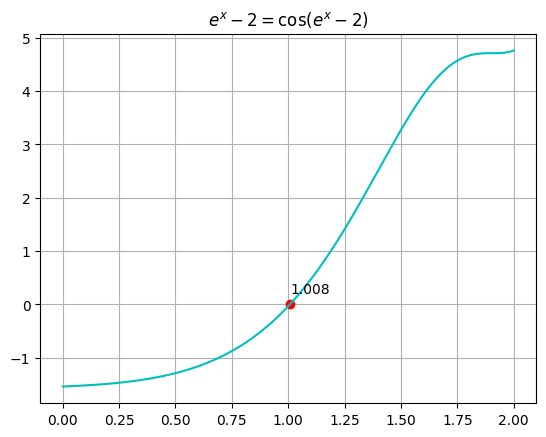

In [236]:
plt.figure(facecolor="w")
plt.plot(P_n,0,"ro")
plt.title('$e^{x}-2= \cos(e^x-2)$')
plt.text(P_n,0.2,f'{P_n:.4}')
plt.plot(x_,f(x_),"c")
plt.grid()

**Punto fijo**

In [238]:
def g(x):
  return x-f(x)
x=np.linspace(-2,2,1000)
P_p=optimize.fixed_point(g,0.5)
print('La raiz hallada por punto fijo es :', P_p)

La raiz hallada por punto fijo es : 1.0076239716581368


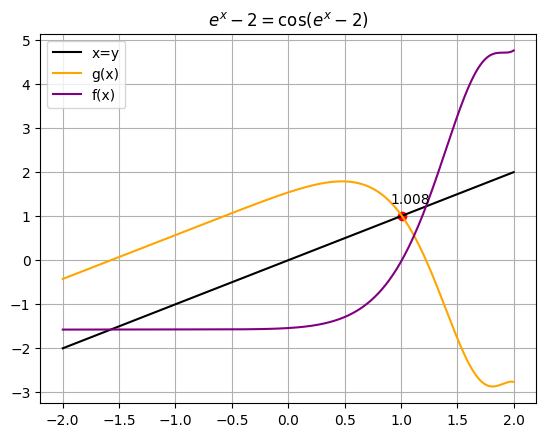

In [240]:
plt.plot(P_p,P_p,'ro')
plt.text(P_p-0.1,1.3,f'{P_p:.4}')
plt.plot(x,x,'k',label='x=y')
plt.title('$e^{x}-2= \cos(e^x-2)$')
plt.plot(x,g(x),'orange',label='g(x)')
plt.plot(x,f(x),'purple',label='f(x)')
plt.legend()
plt.grid()

#3. Partícula en reposo
Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo 
$\theta$ cambia con una rapidez constante de : 

\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}

Al final de t segundos, la posición del objeto esta dada por: 


\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2}-\sin\omega t\right) 
\end{equation}


Suponga que la particula se desplazo 0.51m en 1s. Encuentre, con exactitud de $10^{-5}$ la rapidez $\omega$ con que cambia $\theta$. Supoga $g=9.76$m/s

In [10]:
#Las condiciones iniciales son de t= 1 s, con x(1)=0.51 m y la gravedad de g=9.76 m/s^2
def posicion_t(omega):
  return ((-9.76/(2*omega**2))*((np.exp(omega) - np.exp(-omega))/2 - np.sin(omega)))-0.51

In [11]:
raiz = optimize.newton(posicion_t, -0.2, tol=1e-05)
print("La rapidez ω con que cambia θ es de", raiz)

La rapidez ω con que cambia θ es de -0.3135209838641948


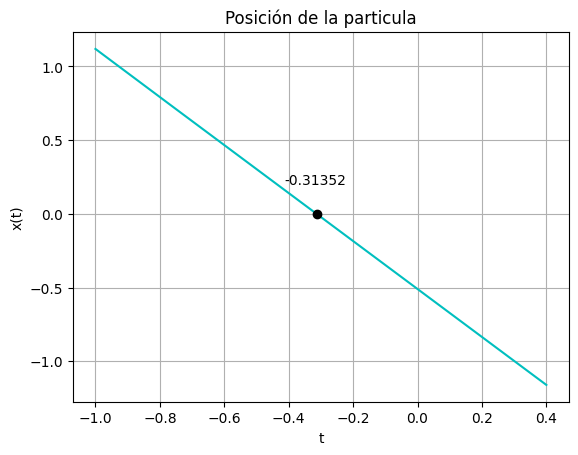

In [231]:
x= np.linspace(-1,0.4 ,1000)
plt.title('Posición de la particula')
plt.plot(x,posicion_t(x),'c')
plt.plot(raiz,0,'ko')
plt.text(raiz-0.1,0.2,f'{raiz:.5}')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid()
plt.show()

#4.  Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:




# **Respuesta**
a) Encontrar la ecuación trascendental.


**R\:**

A partir del área de un círculo de radio r es (1):
\begin{equation}
    πr^2
\end{equation}

Y conociendo que el área de un segmento circular de radio r y ángulo θ es (2):

\begin{equation} 
    A = (1/2) r^2 (θ - sinθ)
\end{equation}

Como buscamos el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo, entonces (3):

\begin{equation} 
    A_{segmento} = (1/4) A_{circulo}
\end{equation}

Igualamos la fórmula (1) y (2) haciendo uso de la (3)

\begin{equation} 
    (1/2) r^2 (θ - sinθ) = (1/4) πr^2
\end{equation}


Simplificando:

\begin{equation} 
    f(θ)= θ - sinθ - (1/2) π
\end{equation}


Esta es la ecuación trascendental que se debe resolver para encontrar a θ del segmento circular.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

In [223]:
funcion= lambda t: t - np.sin(t) - np.pi/2

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2*np.pi, 2*np.pi, 1000 )

In [224]:
datos= np.linspace(-2*np.pi, 2*np.pi,1000)

In [225]:
df = pd.DataFrame(datos)
df.columns = ['theta'] 
df

,theta
0,-6.283185
1,-6.270606
2,-6.258027
3,-6.245448
4,-6.232870
...,...
995,6.232870
996,6.245448
997,6.258027
998,6.270606


d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

In [226]:
df['F_theta'] = df['theta'].apply(funcion)
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


e) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

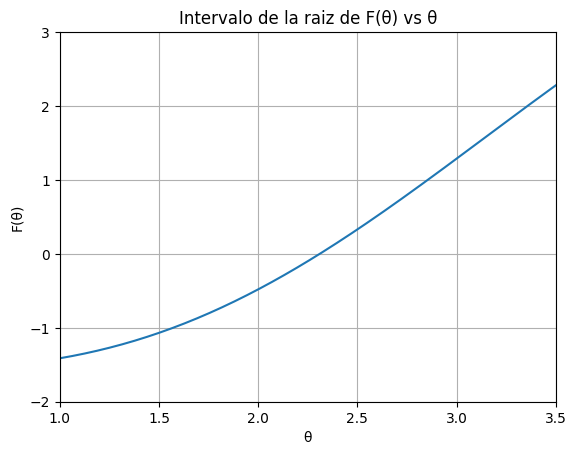

In [229]:
plt.plot(df['theta'],df['F_theta'])
plt.title('Intervalo de la raiz de F(θ) vs θ')
plt.xlabel('θ')
plt.ylabel('F(θ)')
plt.xlim(1,3.5)
plt.ylim(-2,3)
plt.grid()


f) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)



In [18]:
r_b = optimize.bisect(funcion, 2, 3)
print('El valor del ángulo estimado por bisección es:',r_b)

El valor del ángulo estimado por bisección es: 2.309881460010729


g) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

In [19]:
t=sp.symbols('t')

def funcionprima(x):
  return t - sp.sin(t) - sp.pi/2

dev_t=sp.diff(funcionprima(t),t)
dev_t

1 - cos(t)

In [20]:
funcion_p=sp.lambdify(t,dev_t,'numpy')
r_n=optimize.newton(funcion,1,funcion_p)
print('El valor del ángulo estimado por Newton-Raphson es:', r_n)

El valor del ángulo estimado por Newton-Raphson es: 2.309881460010057




h) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 



In [21]:
r_s = optimize.newton(funcion, 2)
print('El valor del ángulo estimado por secante es:',r_s)

El valor del ángulo estimado por secante es: 2.309881460010033


i) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)

In [22]:
def g(x):
  return x-funcion(x)

r_p=optimize.fixed_point(g,0.5)
print('El valor del ángulo estimado por punto fijo es:', r_p)

El valor del ángulo estimado por punto fijo es: 2.309881460010057


En los últimos tres métodos las raices son iguales hasta el decimal $10^-13$, mientras que comparten decimales con la bisección hasta el decimal  $10^-11$.



# 5. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si u es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```



In [111]:
# Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = 30             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [199]:
# Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x =((u*np.cos(alpha))*t)+((1/b)*(v0*np.cos(theta)-u*np.cos(alpha)))*(1-np.exp(-b*t))
  return x

# Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):
  y1 = 1/b*(g/b+v0*np.sin(theta)-u*np.sin(alpha))
  y2=1-np.exp(-b*t) 
  y3= (g/b-u*np.sin(alpha))*t 
  return y1*y2-y3

2. Construya un diccionario con las claves "X", "Y", "Tiempo"


In [201]:
x = pos_x(t, theta, alpha, v0, b, u,g)
y = pos_y(t, theta, alpha, v0, b, u,g)
t = np.linspace(0,100,1000)

In [202]:
dicc = {"X":x, "Y":y, "Tiempo":t} 


3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 regitros para el intervalo de tiempo elegido.


In [203]:
df = pd.DataFrame(dicc)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.0000
1,4.228775,4.187261,0.1001
2,8.421445,8.255666,0.2002
3,12.578191,12.205809,0.3003
4,16.699192,16.038280,0.4004
...,...,...,...
995,-1549.417323,-14785.773201,99.5996
996,-1552.370613,-14805.229167,99.6997
997,-1555.324152,-14824.685951,99.7998
998,-1558.277937,-14844.143547,99.8999




4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).




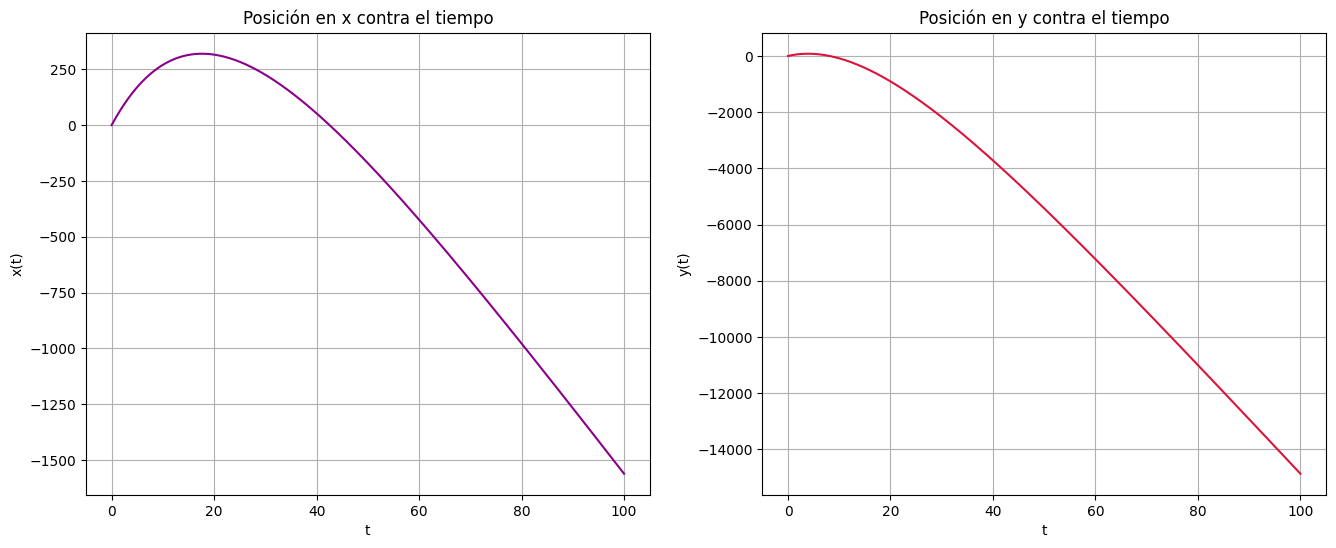

In [204]:
fig,axs=plt.subplots(1,2,figsize=(16,6))

axs[0].set_title('Posición en x contra el tiempo')
axs[0].plot(df['Tiempo'],df['X'],color='darkmagenta',label='x(t)')
axs[0].set_xlabel('t')
axs[0].set_ylabel('x(t)')

axs[1].set_title('Posición en y contra el tiempo')
axs[1].plot(df['Tiempo'],df['Y'],color='crimson',label='y(t)')
axs[1].set_xlabel('t')
axs[1].set_ylabel('y(t)')

axs[0].grid()
axs[1].grid()

fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.2)

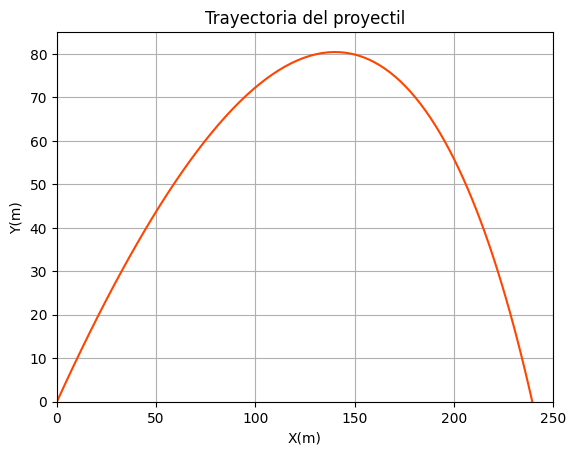

In [205]:
plt.plot(df['X'],df['Y'],color='orangered')
plt.title('Trayectoria del proyectil')
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.xlim(0,250)
plt.ylim(0,85)
plt.grid()

5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  


In [206]:
def pos_y2(t, theta, alpha, v0, b, u,g):
  y1 = 1/b*(g/b+v0*np.sin(theta)-u*np.sin(alpha))
  y2=1-np.exp(-b*t) 
  y3= g/b-u*np.sin(alpha)*t 
  return y1*y2-y3

In [207]:
r_m= optimize.newton(pos_y2, 1,args=(theta,alpha, v0, b, u ,g))
print('La raíz hallada por método de la secante es:',r_m)
print('El alcance máximo es de', pos_x(r_m, theta, alpha, v0, b, u,g).round(decimals=4),'m con θ=45°')

La raíz hallada por método de la secante es: 0.8394287164563136
El alcance máximo es de 34.3557 m con θ=45°



6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados cada 5 grados.


In [208]:
def R(theta):
  return pos_x(r_m,theta,alpha, v0, b, u,g)

val_t=np.arange(10,80,5)
rad_t=np.deg2rad(val_t)

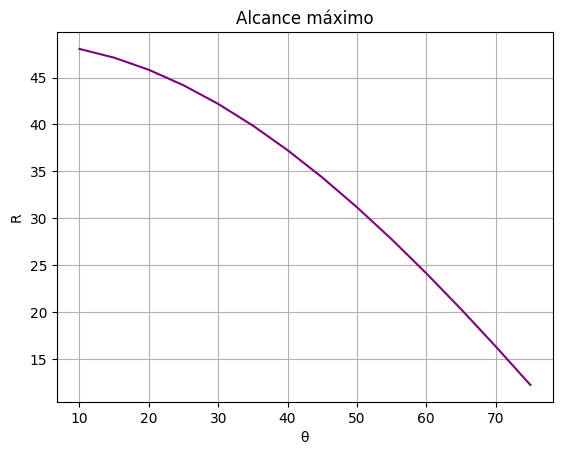

In [210]:
plt.plot(val_t ,R(rad_t),color='purple')
plt.xlabel('θ')
plt.ylabel('R')
plt.title('Alcance máximo')
plt.grid()


# 6. Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}

In [211]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

In [212]:
Npx_X = 120 
Npx_Y = 120 

In [213]:
image = Image.new("RGB", (Npx_X, Npx_Y))   #Creacion de la imagen inicial

In [214]:
npx = np.arange(0, Npx_X) 
npy = np.arange(0, Npx_Y)

In [215]:
xmin = -2
xmax = 2
ymin = -2
ymax = 2
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

In [216]:
def f(z): 
  return z**3-36

In [217]:
def fp(z): 
  return 3*z**2

In [218]:
h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h

In [219]:
a = 0.2
Niteraciones = 150 
eps = 1E-8 #

In [220]:
x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

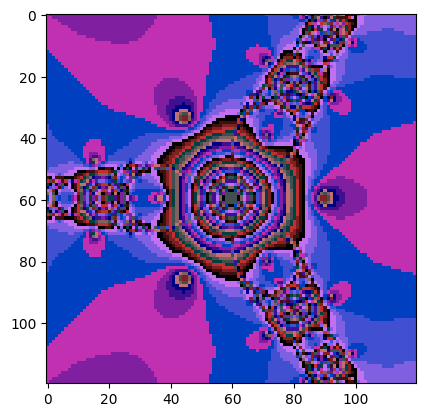

In [221]:
plt.imshow(image)

```
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)
        if( abs(Z-Z_0)<= eps):
          break           
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16      
      image.putpixel((x,y), (r,g,b) )

plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```